# 확률최적화 과제1
# G202158002 신원형

## Ex) 2.9

In [1]:
import numpy as np


def compute_loss(p, theta, B):
    loss = np.sum(np.power(theta[:p//2-1], 4)) + (theta @ B @ theta.T)

    return loss


def generate_B(p):
    off_diagonal = 0.5
    sigma = np.ones([p, p]) * off_diagonal
    np.fill_diagonal(sigma, 1., wrap=True)
    
    return sigma


def generate_d_k(p, rho):
    mu = np.zeros(p)
    cov = np.identity(p) * (rho**2)
    d_k = np.random.multivariate_normal(mu, cov, 1)

    return d_k


def init_theta(p):
    return np.ones(p)


max_iter = 100

### (a)

In [3]:
p = 20
rho_list = [.125, .25, .5, 1.]
max_repl = 40

B = generate_B(p)

for rho in rho_list:
    loss_list = []

    for seed in range(max_repl):
        np.random.seed(seed)
        theta = init_theta(p)
        current_loss = 1e+9

        for iter in range(max_iter):
            d_k = generate_d_k(p, rho)
            new_theta = theta + d_k
            loss = compute_loss(p, new_theta, B)
            if loss < current_loss:
                theta = new_theta
                current_loss = loss

        if type(current_loss) != np.float64:
            current_loss = current_loss[0,0]
        loss_list.append(current_loss)

    print(f"[rho {rho}] Mean Loss = {np.mean(loss_list)}")

[rho 0.125] Mean Loss = 8.562021350376195
[rho 0.25] Mean Loss = 7.048904586215585
[rho 0.5] Mean Loss = 23.47293052643233
[rho 1.0] Mean Loss = 108.07435627343435


### (b)

In [4]:
p = 2
rho_list = [.125, .25, .5, 1.]
max_repl = 40

B = generate_B(p)

for rho in rho_list:
    loss_list = []

    for seed in range(max_repl):
        np.random.seed(seed)
        theta = init_theta(p)
        current_loss = 1e+9

        for iter in range(max_iter):
            d_k = generate_d_k(p, rho)
            new_theta = theta + d_k
            loss = compute_loss(p, new_theta, B)
            if loss < current_loss:
                theta = new_theta
                current_loss = loss

        if type(current_loss) != np.float64:
            current_loss = current_loss[0,0]
        loss_list.append(current_loss)

    print(f"[rho {rho}] Mean Loss = {np.mean(loss_list)}")

[rho 0.125] Mean Loss = 0.0004925655557433911
[rho 0.25] Mean Loss = 0.0013197533584475964
[rho 0.5] Mean Loss = 0.0047459818410065194
[rho 1.0] Mean Loss = 0.02327124684339065


## Ex) 2.13

In [18]:
import numpy as np


def compute_loss(theta, sigma, noisy=True):
    loss = np.power(theta[0], 4) + np.power(theta[0], 2) + (theta[0] * theta[1]) + np.power(theta[1], 2)
    if noisy:
        noise = generate_noise(sigma)
        obs_loss = loss + noise
    else:
        obs_loss = loss

    return obs_loss


def generate_noise(sigma):
    noise = np.random.normal(0, sigma**2, 1)[0]
    return noise


def generate_d_k():
    mu = np.zeros(2)
    cov = np.identity(2) * (0.125**2)
    d_k = np.random.multivariate_normal(mu, cov, 1)

    return d_k


def init_theta():
    return np.ones(2)

### (a)

In [6]:
sigma_list = [0.001, 0.01, 0.1, 1.0]
max_iter = 10000
max_repl = 40

avg_loss_num = 10

for method in ["avg", "theshold"]:

    for sigma in sigma_list:
        loss_list = []

        for seed in range(max_repl):
            np.random.seed(seed)
            theta = init_theta()
            current_loss = 1e+9

            for iter in range(max_iter):
                d_k = generate_d_k()
                new_theta = theta + d_k[0]

                if method == "avg":
                    obs_list = []
                    for _ in range(avg_loss_num):
                        obs_loss = compute_loss(new_theta, sigma)
                        obs_list.append(obs_loss)
                    loss = np.mean(obs_loss)
                
                else:
                    loss = (compute_loss(new_theta, sigma) + sigma*2)

                if loss < current_loss:
                    theta = new_theta
                    current_loss = loss

            if type(current_loss) != np.float64:
                current_loss = current_loss[0,0]
            loss_list.append(current_loss)

        print(f"[Method : {method} / sigma {sigma}] Mean Loss = {np.mean(loss_list)}")

[Method : avg / sigma 0.001] Mean Loss = 3.0853740895768642e-06
[Method : avg / sigma 0.01] Mean Loss = -0.0001761567768186725
[Method : avg / sigma 0.1] Mean Loss = -0.032135930929431844
[Method : avg / sigma 1.0] Mean Loss = -3.5868392951891748
[Method : theshold / sigma 0.001] Mean Loss = 0.0020029102356152574
[Method : theshold / sigma 0.01] Mean Loss = 0.019835476291479352
[Method : theshold / sigma 0.1] Mean Loss = 0.16768989411038782
[Method : theshold / sigma 1.0] Mean Loss = -1.5225378988043958


### (b)

In [20]:
sigma_list = [0.001]
max_iter = 10000
max_repl = 40

for sigma in sigma_list:
    loss_list = []

    for seed in range(max_repl):
        np.random.seed(seed)
        theta = init_theta()
        current_loss = 1e+9

        for iter in range(max_iter):
            d_k = generate_d_k()
            new_theta = theta + d_k[0]
            loss = compute_loss(theta, sigma, noisy=False)

            if loss < current_loss:
                theta = new_theta
                current_loss = loss

        if type(current_loss) != np.float64:
            current_loss = current_loss[0,0]
        loss_list.append(current_loss)

    print(f"[Noisy Free / sigma {sigma}] Loss = {np.round(np.mean(loss_list), 3)} ± {np.round(np.std(loss_list, ddof=1),3)}")

avg_loss_num = 10
for method in ["avg", "theshold"]:

    for sigma in sigma_list:
        loss_list = []

        for seed in range(max_repl):
            np.random.seed(seed)
            theta = init_theta()
            current_loss = 1e+9

            for iter in range(max_iter):
                d_k = generate_d_k()
                new_theta = theta + d_k[0]

                if method == "avg":
                    obs_list = []
                    for _ in range(avg_loss_num):
                        obs_loss = compute_loss(new_theta, sigma)
                        obs_list.append(obs_loss)
                    loss = np.mean(obs_loss)
                
                else:
                    loss = (compute_loss(new_theta, sigma) + sigma*2)

                if loss < current_loss:
                    theta = new_theta
                    current_loss = loss

            if type(current_loss) != np.float64:
                current_loss = current_loss[0,0]
            loss_list.append(current_loss)

        print(f"[Noisy / Method : {method} / sigma {sigma}] Loss = {np.round(np.mean(loss_list), 3)} ± {np.round(np.std(loss_list, ddof=1),3)}")


[Noisy Free / sigma 0.001] Loss = 3.484 ± 0.927
[Noisy / Method : avg / sigma 0.001] Loss = 0.0 ± 0.0
[Noisy / Method : theshold / sigma 0.001] Loss = 0.002 ± 0.0


## 3.2

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def generate_w_k():
    return np.random.normal(0,1,1)[0]


def generate_x_k(x):
    return -0.99 * x + generate_w_k()

def compute_grad(y, x, theta):
    return x*(x * theta - y)

def update_theta(theta, grad, a):
    return theta - a * grad

max_iter = 500
a = 0.005
x = 0
theta = 0

theta_list = [theta]
for _ in range(max_iter):
    x_new = generate_x_k(x)
    grad = compute_grad(x_new, x, theta)
    theta = update_theta(theta, grad, a)
    x = x_new
    theta_list.append(theta)

### (a)

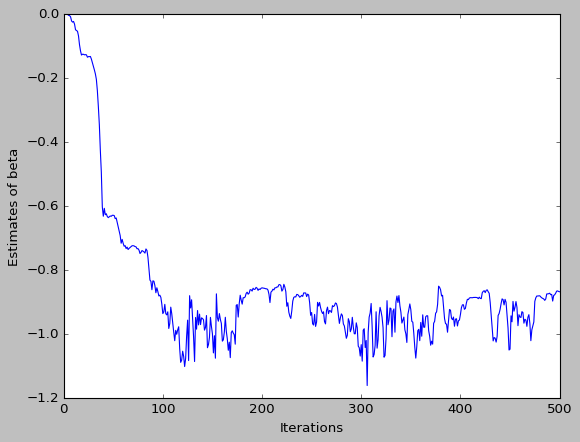

In [9]:
plt.style.use('classic')
plt.plot(theta_list)
plt.xlabel("Iterations")
plt.ylabel("Estimates of beta")
plt.show()

### (b)

In [10]:
max_repl = 50
max_iter = 500
a = 0.005

theta_list = []
for seed in range(max_repl):
    np.random.seed(seed)
    x = 0
    theta = 0
    for _ in range(max_iter):
        x_new = generate_x_k(x)
        grad = compute_grad(x_new, x, theta)
        theta = update_theta(theta, grad, a)
        x = x_new
    theta_list.append(theta)

print(f"Estimates of Beta: {np.round(np.mean(theta_list),3)} ± {np.round(np.std(theta_list, ddof=1),3)} (n = 50)")

Estimates of Beta: -0.946 ± 0.056 (n = 50)


## 3.8

In [12]:
import numpy as np


def generate_h_k(iter):
    return np.array([iter, 1])


def generate_v_k():
    return np.random.normal(0, 1, 1)[0]


def generate_z_k(h_k):
    v_k = generate_v_k()
    return np.inner(h_k, np.array([1, 2])) + v_k


def compute_p_k(p_k_inv, h_k):
    return np.linalg.inv(p_k_inv + np.outer(h_k, h_k))


def update_theta(theta, p_k, p_k_inv, h_k, z_k):
    return np.inner(p_k, (np.inner(p_k_inv, theta) + (h_k * z_k)))


n_list = [10, 100, 1000, 10000]
p_k = np.zeros([2, 2])
np.fill_diagonal(p_k, 1., wrap=True)
p_k *= 100
theta = np.zeros([2])

for iter in range(1, max(n_list)+1):
    h_k = generate_h_k(iter)
    z_k = generate_z_k(h_k)
    p_k_inv = np.linalg.inv(p_k)
    p_k = compute_p_k(p_k_inv, h_k)
    theta = update_theta(theta, p_k, p_k_inv, h_k, z_k)
    if iter in n_list:
        print(f"[Iteration {iter}] theta = {theta}")
    

[Iteration 10] theta = [1.03761981 2.7615011 ]
[Iteration 100] theta = [0.99346027 2.49850425]
[Iteration 1000] theta = [0.9998716  2.07836304]
[Iteration 10000] theta = [0.9999995  2.00471345]


* 업데이트 수 $n$에 따라 결과가 달라짐을 확인 할 수 있음

## 3.10

In [13]:
import numpy as np


def generate_h_k(iter):
    return np.array([iter, 1])


def generate_v_k(c):
    return np.random.normal(0, c, 1)[0]


def generate_z_k(h_k, c):
    if h_k[0] % 2:
        v_k = generate_v_k(1)
    else: 
        v_k = generate_v_k(c)
    return np.inner(h_k, np.array([1, 2])) + v_k

In [14]:
def compute_p_k(p_k, h_k):
    numer = np.outer(np.inner(p_k, h_k), h_k) @ p_k
    denom = 1 + np.inner(np.inner(h_k, p_k), h_k)
    return p_k - numer / denom


def update_theta(theta, p_k, h_k, z_k):
    return theta - (p_k @ h_k) * (np.inner(h_k, theta) - z_k)


n_list = [10, 100, 1000, 10000, 100000]
c_list = [100, 1000]

theta = np.zeros([2])
p_k = np.zeros([2, 2])
np.fill_diagonal(p_k, 1., wrap=True)
p_k *= 100

print("===========UNWEIGHTED RLS===========")
for c in c_list:
    for iter in range(1, max(n_list)+1):
        h_k = generate_h_k(iter)
        z_k = generate_z_k(h_k, c)
        p_k = compute_p_k(p_k, h_k)
        theta = update_theta(theta, p_k, h_k, z_k)
        if iter in n_list:
            print(f"[C = {c} / Iteration {iter}] theta = {theta}")
print()

===========UNWEIGHTED RLS===========
[C = 100 / Iteration 10] theta = [-3.31453187 37.43851152]
[C = 100 / Iteration 100] theta = [  1.21142865 -14.4799873 ]
[C = 100 / Iteration 1000] theta = [0.99316249 0.57261662]
[C = 100 / Iteration 10000] theta = [ 1.00058738 -1.48140724]
[C = 100 / Iteration 100000] theta = [1.00001289 1.37303256]
[C = 1000 / Iteration 10] theta = [1.00001261 1.39114018]
[C = 1000 / Iteration 100] theta = [1.00001678 1.11370247]
[C = 1000 / Iteration 1000] theta = [1.00000722 1.75193476]
[C = 1000 / Iteration 10000] theta = [0.99998448 3.32349998]
[C = 1000 / Iteration 100000] theta = [ 0.99999647 -0.07018419]



In [15]:
def compute_p_k(p_k, h_k, c):
    numer = np.outer(np.inner(p_k, h_k), h_k) @ p_k
    if h_k[0] % 2 :
        weight = 1
    else:
        weight = c
    denom = weight + np.inner(np.inner(h_k, p_k), h_k)
    return p_k - numer / denom


def update_theta(theta, p_k, h_k, z_k, c):
    if h_k[0] % 2 :
        weight = 1
    else:
        weight = c
    return theta - (p_k @ h_k) / weight * (np.inner(h_k, theta) - z_k)


n_list = [10, 100, 1000, 10000, 100000]
c_list = [100, 1000]

theta = np.zeros([2])
p_k = np.zeros([2, 2])
np.fill_diagonal(p_k, 1., wrap=True)
p_k *= 100

print("==========WEIGHTED RLS==========")
for c in c_list:
    for iter in range(1, max(n_list)+1):
        h_k = generate_h_k(iter)
        z_k = generate_z_k(h_k, c)
        p_k = compute_p_k(p_k, h_k, c)
        theta = update_theta(theta, p_k, h_k, z_k, c)
        if iter in n_list:
            print(f"[C = {c} / Iteration {iter}] theta = {theta}")
print()

==========WEIGHTED RLS==========
[C = 100 / Iteration 10] theta = [1.03057857 0.90027507]
[C = 100 / Iteration 100] theta = [1.00494368 1.77184645]
[C = 100 / Iteration 1000] theta = [0.99977449 2.1518769 ]
[C = 100 / Iteration 10000] theta = [0.99999427 2.04587321]
[C = 100 / Iteration 100000] theta = [0.99999998 2.00167136]
[C = 1000 / Iteration 10] theta = [0.99999998 2.00155401]
[C = 1000 / Iteration 100] theta = [1.         2.00025922]
[C = 1000 / Iteration 1000] theta = [1.00000002 1.99861169]
[C = 1000 / Iteration 10000] theta = [0.99999997 2.00195292]
[C = 1000 / Iteration 100000] theta = [1.00000008 1.99780157]

